In [1]:
from navigation.un_field import *
import navigation.arena_utils as arena_utils
import math
from typing import List, Tuple
from random import randint
import matplotlib.pyplot as plt

# Definindo funções auxiliares

In [2]:
def rad2degree(theta: float):
    return theta * 180 / math.pi

In [3]:
def create_random_vector() -> Vec2D:
    # Cria um vetor aleatório dentro das dimensões da arena.
    return Vec2D(randint(0, arena_utils.MAX_W_SIZE), randint(0, arena_utils.MAX_H_SIZE))

In [4]:
def run_iterative_univector(univector, 
                            origin_pos: Vec2D, 
                            target_pos: Vec2D, 
                            approach_angle: float,
                            obstacles: List[Vec2D],
                            step_size: float = 3, 
                            acceptance_radius: float = 4,
                            max_iter=1000) -> Tuple[Vec2D, Vec2D]:

    axis_origins = []
    axis = []

    i = 0
    origin_pos = origin_pos.copy()

    print(f"Origem: {origin_pos}, Destino: {target_pos}")

    while (origin_pos - target_pos).norm() > acceptance_radius:

        if i > max_iter: break

        theta = univector.get_angle(
            origin_pos,
            target_pos,
            approach_angle,
            obstacles
        )

        axis_to_follow = create_unit_vector_from_angle(theta)

        axis_origins.append(origin_pos)
        axis.append(axis_to_follow)

        origin_pos += step_size * axis_to_follow

        i += 1
    
    print(f"Finalizado com {i} iterações.")
    return axis_origins, axis

In [5]:
def plot_trajectory(origin_pos: Vec2D,
                    target_pos: Vec2D,
                    obstacles: List[Vec2D],
                    axis_to_follow: List[Vec2D],
                    axis_origins: List[Vec2D],
                    plot_scale: float = 0.7) -> None:
    
    plt.figure(figsize=(15*plot_scale, 13*plot_scale), dpi=80)

    # Plota a origem e objetivo
    a = plt.scatter(
        [origin_pos[0], target_pos[0]],
        [origin_pos[1], target_pos[1]], 
        color=["b", "g"], s=200
    )

    # Desenhando contornos da arena
    rect = plt.Rectangle((0, 0), 150, 130, linewidth=2, edgecolor='r', facecolor='none')
    a.axes.add_patch(rect)

    # Desenhando obstáculos como círculos vermelhos
    for ob in obstacles:
        circ = plt.Circle((ob[0], ob[1]), params["DMIN"], color='r')
        a.axes.add_patch(circ)

    # Desenhando vetores
    plt.quiver(
        [vec[0] for vec in axis_origins],
        [vec[1] for vec in axis_origins],
        [vec[0] for vec in axis_to_follow],
        [vec[1] for vec in axis_to_follow],
        scale=100
    )

# Especificação dos parâmetros do Univector

In [6]:
# Ararabots
# params = {
#     "DMIN": 5.0,
#     "K0": 0.0,
#     "KR": 38,
#     "LDELTA": 1.94,
#     "RADIUS": 6.0
# }

# Red Dragons
params = {
    "DMIN": 3.5,
    "K0": 0.5,
    "KR": 4,
    "LDELTA": 3.5,
    "RADIUS": 6.0
}

In [7]:
univector = UnivectorField.from_dict(params)

# Plot

In [8]:
step_size = 3
acceptance_radius = 6
max_iter = 1000

In [15]:
n_obstacles = 5                                                     # Número de obstáculos a criar
approach_angle = math.pi/6                                          # Ângulo com o qual se deseja chegar ao ponto alvo

origin_pos = create_random_vector()                                 # Origem em um ponto aleatório
target_pos = create_random_vector()                                 # Alvo em um ponto aleatório

obstacles = [create_random_vector() for _ in range(n_obstacles)]    # Criando obstáculos aleatórios

In [16]:
axis_origins, axis_to_follow = run_iterative_univector(
    univector,
    origin_pos,
    target_pos,
    approach_angle,
    obstacles,
    step_size=step_size,
    acceptance_radius=acceptance_radius,
    max_iter=max_iter
)

Origem: Vec2(78, 115), Destino: Vec2(63, 51)
Finalizado com 24 iterações.


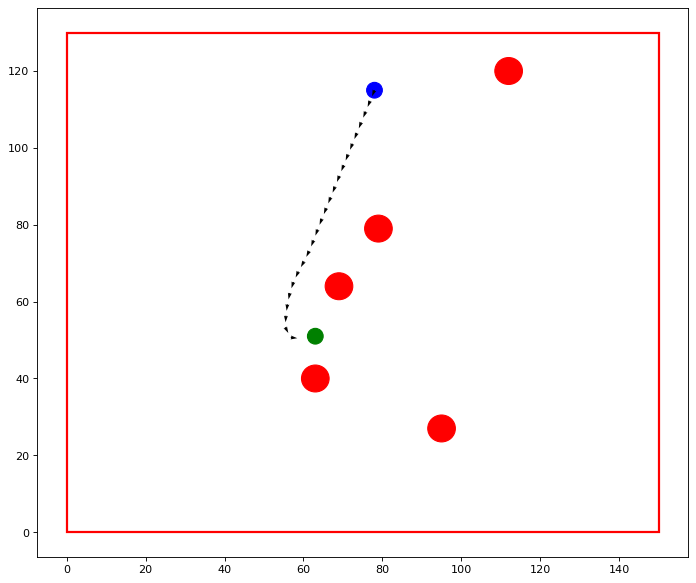

In [17]:
plot_trajectory(
    origin_pos,
    target_pos, 
    obstacles, 
    axis_to_follow,
    axis_origins
)